In [2]:
!pip install wordcloud nltk scikit-learn

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: title={'center': 'Class Distribution'}, xlabel='label'>

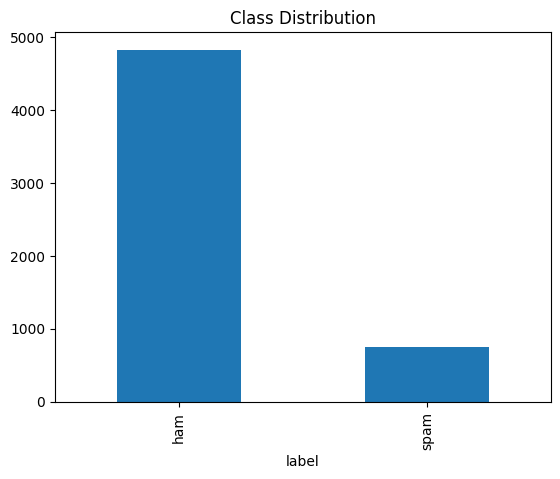

In [6]:
df['label'].value_counts().plot(kind='bar', title='Class Distribution')

In [7]:
stop_words = set(stopwords.words('english'))

def preprocess_for_eda(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and t.isalpha()]
    return tokens

df['tokens'] = df['text'].apply(preprocess_for_eda)

In [8]:
from itertools import chain

def get_top_ngrams(corpus, n=None, gram=1):
    if gram == 1:
        tokens = list(chain(*corpus))
        ngram_list = tokens
    else:
        ngram_list = list(chain(*[list(ngrams(tokens, gram)) for tokens in corpus]))
    return Counter(ngram_list).most_common(n)

for label in ['ham', 'spam']:
    subset = df[df['label'] == label]['tokens']
    print(f"\nTop 10 unigrams in {label}:\n", get_top_ngrams(subset, 10, 1))
    print(f"\nTop 10 bigrams in {label}:\n", get_top_ngrams(subset, 10, 2))
    print(f"\nTop 10 trigrams in {label}:\n", get_top_ngrams(subset, 10, 3))


Top 10 unigrams in ham:
 [('u', 979), ('gt', 318), ('lt', 316), ('get', 301), ('go', 248), ('ok', 245), ('got', 242), ('ur', 237), ('know', 236), ('like', 231)]

Top 10 bigrams in ham:
 [(('lt', 'gt'), 276), (('gon', 'na'), 58), (('call', 'later'), 50), (('let', 'know'), 39), (('sorry', 'call'), 38), (('r', 'u'), 37), (('u', 'r'), 35), (('good', 'morning'), 31), (('take', 'care'), 31), (('u', 'wan'), 29)]

Top 10 trigrams in ham:
 [(('sorry', 'call', 'later'), 38), (('lt', 'decimal', 'gt'), 23), (('gt', 'lt', 'gt'), 18), (('happy', 'new', 'year'), 18), (('lt', 'gt', 'lt'), 16), (('like', 'lt', 'gt'), 14), (('pls', 'send', 'message'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'pls'), 12)]

Top 10 unigrams in spam:
 [('call', 346), ('free', 219), ('txt', 156), ('ur', 144), ('u', 141), ('mobile', 123), ('text', 121), ('stop', 114), ('claim', 113), ('reply', 104)]

Top 10 bigrams in spam:
 [(('please', 'call'), 45), (('po', 'box'), 24), ((

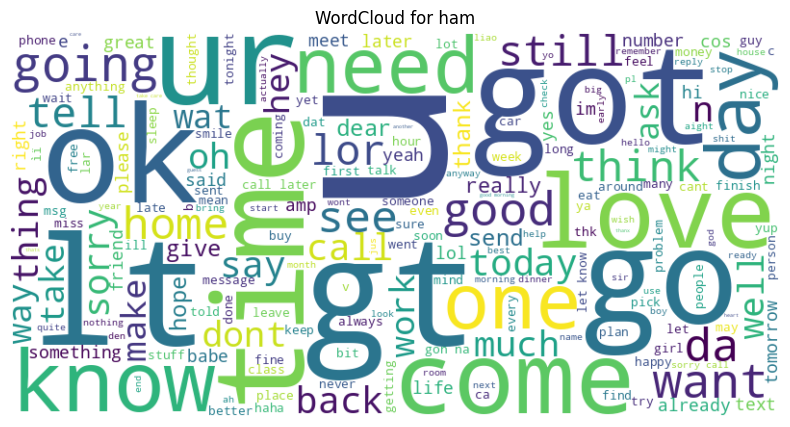

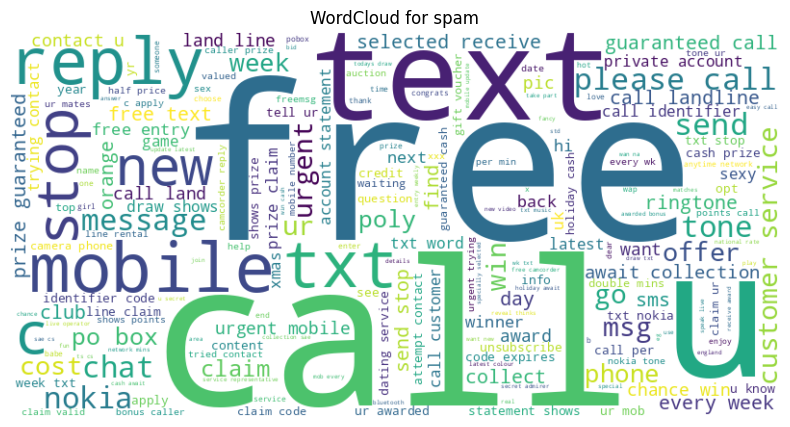

In [9]:
for label in ['ham', 'spam']:
    all_words = ' '.join([' '.join(tokens) for tokens in df[df['label'] == label]['tokens']])
    wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {label}')
    plt.axis('off')
    plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# BoW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
bow_f1 = f1_score(y_test, y_pred_bow, pos_label='spam')
print("F1-score (BoW):", bow_f1)

F1-score (BoW): 0.9097472924187726


In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
tfidf_f1 = f1_score(y_test, y_pred_tfidf, pos_label='spam')
print("F1-score (TF-IDF):", tfidf_f1)

F1-score (TF-IDF): 0.8646616541353384


In [12]:
lemmatizer = WordNetLemmatizer()

def full_preprocess(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)  # remove emails
    text = re.sub(r'http\S+|www\S+', '', text)  # remove urls
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(full_preprocess)

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)
X_train_tf_clean = tfidf_vectorizer.fit_transform(X_train)
X_test_tf_clean = tfidf_vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tf_clean, y_train)
y_pred_tf_clean = model.predict(X_test_tf_clean)
tfidf_clean_f1 = f1_score(y_test, y_pred_tf_clean, pos_label='spam')
print("F1-score (TF-IDF + Preprocessing):", tfidf_clean_f1)

F1-score (TF-IDF + Preprocessing): 0.7777777777777778


In [13]:
results = pd.DataFrame({
    'Model': ['BoW', 'TF-IDF', 'TF-IDF + Preprocessing'],
    'F1-score': [bow_f1, tfidf_f1, tfidf_clean_f1]
})
print(results)

                    Model  F1-score
0                     BoW  0.909747
1                  TF-IDF  0.864662
2  TF-IDF + Preprocessing  0.777778
